<a href="https://colab.research.google.com/github/warutboom100/flutter-beacon/blob/main/demo1_Beacon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Maincode

In [53]:
from google.colab import drive

In [54]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [55]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import matplotlib.pyplot as plt 

In [57]:
import pandas as pd
import xlsxwriter

In [58]:
import numpy as np

In [59]:
import math

In [60]:
readDataframe1 = pd.read_excel (r'/content/gdrive/My Drive/data/rssi-filter1.xlsx')

##Trilateration

In [61]:
##proposal##
def trilateration(P1, P2, P3, r1, r2, r3):

  p1 = np.array([0, 0, 0])
  p2 = np.array([P2[0] - P1[0], P2[1] - P1[1], P2[2] - P1[2]])
  p3 = np.array([P3[0] - P1[0], P3[1] - P1[1], P3[2] - P1[2]])
  v1 = p2 - p1
  v2 = p3 - p1

  Xn = (v1)/np.linalg.norm(v1)

  tmp = np.cross(v1, v2)

  Zn = (tmp)/np.linalg.norm(tmp)

  Yn = np.cross(Xn, Zn)

  i = np.dot(Xn, v2)
  d = np.dot(Xn, v1)
  j = np.dot(Yn, v2)

  X = ((r1**2)-(r2**2)+(d**2))/(2*d)
  Y = (((r1**2)-(r3**2)+(i**2)+(j**2))/(2*j))-((i/j)*(X))
  Z1 = np.sqrt(max(0, r1**2-X**2-Y**2))
  Z2 = -Z1 

  K1 = P1 + X*Xn + Y * Yn + Z1 * Zn
  K2 = p1 + X * Xn + Y * Yn - Z2 * Zn
  return (K1+K2)*0.5

##characteristics signal beacon

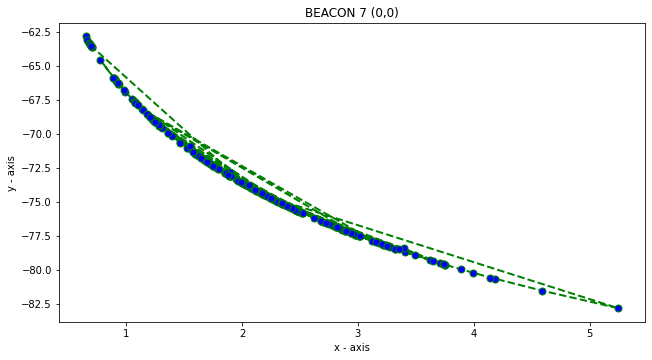

In [175]:
#@title
x = [-62.84045254382595, -63.335915562871506, -63.08210041465684, -63.35052766989298, -63.422258635728724, -63.55141708955277, -63.62487424023504, -63.630451877363676, -63.53404243014931, -63.532553527416276, -73.72836319857608, -71.45670175142541, -71.62589964471624, -72.29218793970635, -72.43537661171858, -72.4754637307814, -72.34748059450017, -71.97743691821115, -72.04528678421204, -72.21063896087125, -70.61697811452235, -72.86380773938846, -72.91091597479623, -73.08663872197809, -73.34417088047542, -73.08991003662081, -72.33526065485974, -71.6976248028465, -71.48626522741085, -71.54565681414893, -71.05208305969629, -71.6571982931669, -72.87775739398866, -73.96824061080099, -74.51648699492145, -74.27619947983241, -73.77437637488752, -73.48882869055019, -74.07432271148771, -74.51468536679228, -78.69664477249826, -77.91908536517536, -77.54711502334462, -77.86629812701807, -78.15840560435282, -78.04341344230487, -78.20210944777685, -78.17578610314852, -78.44482754765755, -77.97504962460704, -68.17237129177983, -66.89603337422979, -66.27957489807211, -66.35916033309105, -66.32128822038365, -66.13319619153745, -66.00233444433209, -65.9067919658254, -65.8920351863785, -65.87989483595148, -64.55904576899373, -66.28132831818766, -66.27148878211553, -66.81484170595151, -67.46953749790023, -67.585193509995, -67.65635867339229, -67.73427913300243, -67.70457599734799, -67.91432726991422, -75.00468565970579, -74.80909563452919, -74.53017546555908, -74.18230021821411, -74.68254856365311, -75.0321209456195, -75.36399704913019, -75.08835577044992, -74.90950134965468, -74.6033515546547, -82.82765860431991, -81.54051387245188, -80.65913078586578, -80.57144967173504, -80.22094670231182, -79.97226420826692, -79.62751122508303, -79.52111549969288, -79.57830699745878, -79.61899603592462, -74.80865797894958, -75.54702710196364, -75.65884641442415, -75.69110004908893, -75.76738521299716, -75.81858682205333, -75.78271778237202, -75.77895815811979, -75.7482556928128, -75.79741927516243, -69.96344429334744, -70.15066712915497, -69.13021837772786, -68.74259123384067, -69.23679483433612, -69.08345209676959, -68.95224456637669, -69.04314510788222, -69.38064792625825, -69.42447636967724, -74.00016727962506, -74.06556626828058, -75.6588145671506, -75.4498165365441, -74.14314571438153, -74.4059932562896, -74.71205669991703, -74.82483841534571, -74.76723858563187, -74.44053797012138, -72.84594187971034, -76.73277297815433, -77.4172148484302, -78.28357295660408, -79.59260497644878, -79.27598894414032, -78.33077994376055, -77.41302342395629, -76.85194401681143, -76.47897195930149, -73.65322798857659, -74.38411671711978, -75.22194997727108, -75.4695405057142, -75.57064629955178, -75.73599773307751, -75.85220481045003, -75.653604065479, -76.41734552424737, -77.12679085508485, -78.43352418096357, -79.35565280135027, -78.92765636360805, -78.12444788650035, -77.47379316559297, -77.04140103935813, -77.17444714348872, -77.44814362871048, -77.51779732798869, -77.52127580230052, -68.25142415660684, -71.02435178241751, -71.89741015207098, -72.09537481244632, -72.5743383157487, -73.07814368262015, -73.3971435091268, -73.6117772322778, -73.64932779304402, -73.55204145691262, -68.61101379022331, -69.03885148347442, -69.45800832922285, -69.41754876974997, -69.05804252112422, -68.94076157180288, -68.94900460237585, -69.05222417330636, -68.89626732738058, -68.57166777514237, -70.86394847291008, -72.48257367396869, -71.36124845588515, -70.65671447225017, -69.9180440454832, -69.55572633438116, -69.39543791066669, -69.37888476770232, -69.13629961355474, -68.74844671740055, -74.23608433806865, -74.96740458037128, -74.80647884459397, -74.88916754899635, -75.14574477465347, -75.11072671143187, -74.96160493435292, -74.91571684721328, -75.02855671206916, -74.9978416924918, -71.97860892982835, -72.33678220634354, -72.61528278284396, -72.8837821084678, -72.91767074567528, -73.13945751280052, -73.62698184103081, -73.69824377683274, -73.56705395204781, -73.43915552176611, -71.7553845259369, -72.03970070070308, -73.00472953333593, -73.75775893961345, -74.1170455920275, -73.98838273892056, -74.21573738807255, -74.36043102630302, -74.48293594172576, -74.49823392439832, -71.32362482981829, -73.54054766061729, -73.9379411219897, -73.94160375939721, -74.22433801411498, -74.37301201068341, -74.37237632533058, -74.59102559401052, -74.13676622217758, -73.85429009096033, -74.32427443928587, -76.18778684501213, -77.09086595064176, -77.28501976784909, -78.247188452311, -78.4488089484666, -77.38547607284079, -76.79894652385528, -76.40177322886447, -76.58220458457717, -73.80392353047596, -75.54960894576308, -75.57573791390043, -74.74009864004414, -75.09895016573408, -75.46296117921058, -75.15012832072128, -75.23803754405823, -75.30232048843331, -75.12458628880253, -78.44246327929945, -77.53196632910822, -76.951934012737, -76.87588806194272, -77.11800787183493, -77.29049847185429, -77.16712065685999, -76.88983064392757, -76.67061503175853, -76.57259491989103]
y = readDataframe1['dist1']
plt.plot(y, x, color='green', linestyle='dashed', linewidth = 2,marker='o', markerfacecolor='blue', markersize=7)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('BEACON 7 (0,0)')
  
# function to show the plot
plt.show()

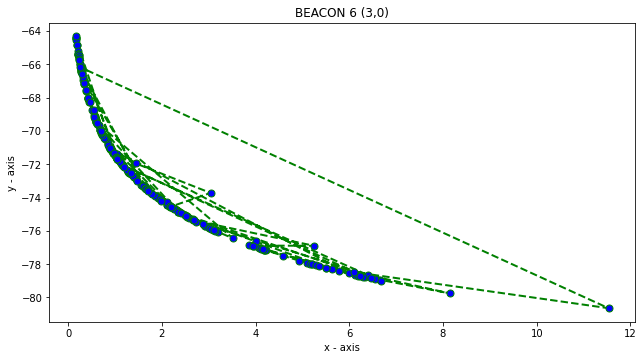

In [176]:
#@title
x = [-71.9383358164157, -71.08823525164006, -72.77615254623956, -72.60276786234266, -72.06494954341547, -71.93761096914145, -71.90706056640641, -72.0095615458702, -71.9325287203927, -72.03947545669496, -78.75597392033086, -77.12428824186269, -77.5046058027731, -77.79395310960706, -77.91538770637062, -77.99857717265155, -77.97810349257946, -78.00996683287505, -78.07176508307138, -78.31904152637557, -75.26275112947621, -73.22917493868896, -72.90265761480828, -72.79313648849015, -72.6068050305832, -72.52181660644735, -72.46794595486323, -72.43848197600853, -72.40145727724808, -72.35566328574141, -73.3226156530104, -75.66606530145494, -75.9329842526337, -76.06123174567621, -75.99708087057222, -75.70647715123391, -75.44886611330487, -75.71339304442749, -75.824286088019, -75.89083651088205, -73.26159570180982, -75.5884661743907, -78.64683542241613, -79.76071047442615, -78.63892205712688, -78.68238820736781, -78.10855092639775, -78.22095465332876, -78.21711438493098, -78.9731663283784, -72.08590268425053, -73.49372812148526, -74.63848207561011, -74.84685045253867, -74.8797404686992, -75.07196620866783, -75.16564776285588, -75.23203873700221, -75.34262365974145, -75.3738433442141, -76.89880546920291, -76.88256060497605, -77.03904205854892, -77.17595775253596, -77.12618674226296, -77.15252341535293, -77.11311654771568, -77.07839672964764, -76.93849976788698, -76.82291490462404, -76.62028642210231, -76.89199603428311, -77.0662688045338, -78.42091183834195, -78.75955210430692, -78.9118005282038, -78.98784593474963, -78.86030045629973, -78.71464099722859, -78.55819041835107, -71.03796827755573, -71.50848023752414, -72.70077373964648, -74.03578335395422, -74.43706865902955, -74.53667150916752, -74.43781342530318, -74.55917836409994, -74.70832365258185, -74.85643214680952, -69.68169003755831, -70.78226707161956, -71.13226673554506, -70.99992278017997, -71.02991971313156, -70.93071606911529, -71.05903017898773, -71.07748229330709, -71.0526975298473, -71.05399103640758, -68.72771807069812, -67.20254174657889, -66.50946610932445, -66.35369578507235, -66.2833686875604, -66.37874161437617, -66.43775327541904, -66.39596568749272, -66.21284750409313, -66.18739871551175, -80.64493031521424, -78.47448993485256, -75.0305936401559, -73.90753466142755, -74.11254628587322, -73.72930882556068, -73.40296838525448, -73.33438447956631, -73.32805212644863, -73.36487048977075, -66.2756342269555, -67.19032143975367, -67.62380575307658, -68.06847337060753, -68.23659484011583, -68.1601370180627, -68.02522518399266, -68.00217333838685, -68.04308235948054, -68.01775611926413, -71.0, -71.09923781008006, -71.35523697768221, -71.66695117962635, -71.74530990278679, -71.77513816339322, -71.59705793900159, -71.52934618364607, -71.47434311191378, -71.46039552041879, -73.72276352818011, -74.5410724249322, -73.77876906554965, -73.2833534687327, -72.99776037714143, -73.40411089330391, -73.47426400769596, -73.50208302249779, -73.56308184207145, -73.57938931796447, -66.91648089785701, -65.44235109106776, -65.61388228869882, -65.9752585619396, -65.46683824983813, -64.81356150028385, -64.44915750951682, -64.43836750512804, -64.42240710914645, -64.55008283584742, -71.35033405490873, -72.55752829860985, -71.02135772359574, -70.94391431641577, -71.31689723152012, -71.0061384377293, -71.11440512961818, -71.55582036598757, -71.88646440729815, -72.1532824693811, -69.08035868059302, -69.3300970857031, -69.96873463274841, -69.45890821067427, -69.19264385959464, -69.23201349948293, -69.34620801804007, -69.41292264067683, -69.46953829359444, -69.6001133782134, -69.63642950294826, -69.2409023706852, -69.04192755581991, -69.24027173959675, -69.46294996808948, -69.37832911424901, -69.21452410563941, -69.22750970343017, -69.30594314189078, -69.15141958657715, -70.70893684910557, -74.2882608417169, -75.139124628449, -74.94613022599893, -74.18278159510533, -74.53554494107163, -74.59459443811721, -75.10660152115169, -75.95059824568908, -76.45130882852897, -69.53412888810105, -71.36475503565065, -71.32147089037646, -71.2984151407019, -71.50980792108828, -71.28110680994891, -71.38086597267936, -71.47527524068163, -71.62360285451393, -71.66241112301262, -68.73586096387751, -68.26634143236289, -67.54426454305386, -67.14965420881543, -66.78561092607337, -66.4944092996488, -66.2373485318945, -66.00187639542814, -66.16087380222051, -66.558038155851, -64.32748243564966, -64.8293905325524, -65.18692576983162, -65.39174565353431, -65.38431505001667, -65.41024569142348, -65.47107369822844, -65.54562133674004, -65.66585584952719, -65.76769664045806, -71.36720258732434, -70.85265590596845, -70.46352819375753, -70.40502115734976, -70.21864445213367, -69.94873417055943, -70.10349046771096, -70.03901957789344, -69.96100692237603, -70.02242038700724, -71.04472582636379, -71.34115733862149, -71.61521688517607, -71.65540556314019, -71.58178132783348, -71.59958975232982, -71.60117840459952, -71.6000290981736, -71.62944319646554, -71.65917397513421]
y = readDataframe1['dist2']
plt.plot(y, x, color='green', linestyle='dashed', linewidth = 2,marker='o', markerfacecolor='blue', markersize=7)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('BEACON 6 (3,0)')
  
# function to show the plot
plt.show()

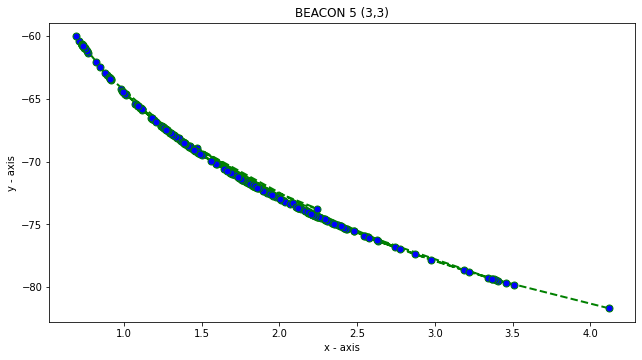

In [178]:
#@title
x = [-81.68603775988397, -79.34729519390164, -79.2547833397828, -77.37833738111736, -76.35537884312424, -76.03570442390763, -75.95563384056823, -76.03117569078448, -75.90918159177653, -76.08710283431044, -76.83114516520493, -74.88206013950418, -73.73330832245269, -74.05801692626345, -73.7334207442777, -73.80642772830328, -74.06976682435983, -74.16264622183019, -74.26528645385152, -74.17161567804641, -75.57043389859585, -77.82341873348732, -78.66059193455078, -78.80063717995766, -79.48513574128167, -79.83895266060094, -79.66858681802036, -79.43467351636916, -79.37971481470665, -79.3469172413099, -75.37190620978646, -73.17972181763608, -73.05259846073452, -73.20612519472908, -72.84398484293168, -72.48983923884296, -72.38629520112687, -72.37546801629058, -72.61086806890029, -72.73671185969633, -75.5635539767506, -75.29029125096221, -75.36203629762295, -75.14359135956347, -75.00290290491783, -74.6180852084791, -74.68104881809872, -74.52344803367674, -74.35937049358367, -74.08862558734137, -68.92868151803196, -75.14706911939845, -74.77305356317555, -74.227397103892, -73.70957903296177, -73.974377036207, -74.38147402902997, -74.6471421923296, -74.40998953845087, -73.9628822674206, -70.21794186755487, -73.3513931639593, -75.28306688810726, -74.89773971165663, -75.07704255588433, -74.73000494136865, -74.41736173846776, -74.20306492970165, -74.0507872324655, -74.19187358454843, -74.58721899270903, -74.96106070759176, -75.17273886447663, -74.45764182356696, -74.31615744241371, -74.16460212289138, -74.23031412418806, -74.21825210667838, -74.23334316921232, -74.18121580008892, -68.90506168544557, -70.62098727721033, -72.05337073824435, -71.89531075237619, -71.28398715917692, -70.89283819845235, -70.856129144758, -70.92153294300022, -70.96264023217209, -71.00412253360125, -71.05201405040664, -72.01225280520782, -72.33475352592116, -72.00202995149765, -71.92277148593587, -71.77888625499823, -71.65823470018765, -71.69571470988485, -71.60253897744711, -71.58870839626448, -71.95578314408868, -71.92226760816357, -71.43425285651443, -71.38314108405152, -71.62864150937781, -71.54854625734254, -71.47626674015741, -71.44371454467486, -71.4359935009091, -71.3837648306152, -72.66789411559877, -70.58245908478581, -69.46711109526808, -69.14726642402807, -69.01606395508915, -68.99781841888944, -69.0644462818225, -69.15433341324935, -69.26541851114884, -69.29768483450205, -68.16500204954748, -68.46243964365436, -68.51018350023142, -68.5505385384256, -68.46773298957557, -68.27465845805577, -68.10830140777904, -67.99061025161136, -67.91347374270369, -67.88491020601673, -73.27891823926728, -76.99374516686254, -76.29070225311472, -73.59964636742963, -72.01386759768708, -70.91680319875643, -70.21533992625301, -70.7209066952081, -71.24252405343005, -71.22404143329464, -73.74637495673771, -73.0233026608589, -71.85013297646225, -71.75405039978146, -72.11303706140187, -72.14046908700817, -72.01376735301777, -71.89017164239036, -71.9837892590289, -72.07724527557464, -73.68021055608004, -69.95135759230403, -68.80561044375303, -68.34071467225867, -67.83206306773604, -67.15934320380781, -66.67038013373713, -66.57149000572907, -66.58289277967998, -66.51858182876191, -65.87593266134105, -65.45003206862981, -65.39120104236098, -65.48301747340561, -65.57944978855008, -65.56714155660252, -65.6115584134057, -65.6983318143352, -65.76291153460602, -65.84352887066588, -68.15180727003658, -69.26571317498241, -68.77305092009561, -68.02664069081825, -67.49306562830921, -67.49326825423918, -67.69184280964521, -67.63932257378524, -67.3893207858105, -67.2647935168886, -64.23058601615755, -64.6095383363004, -64.39025149409957, -64.44643223073541, -64.65402105679536, -64.6904256085797, -64.61440786807626, -64.55056909582548, -64.58062443879051, -64.47438649944232, -66.51957316169482, -67.87191780192902, -67.71660087066168, -67.27124725130699, -67.35518104966059, -67.3435549524535, -67.26001139054397, -67.15764413202486, -67.19094650482447, -67.25447733269856, -65.54133649925996, -66.81293742591359, -67.7598798800516, -67.55532666665778, -67.30670553474458, -67.35501494740335, -67.43579992278255, -67.52136665581483, -67.50670469963774, -67.46299730097016, -68.7699218623109, -69.36144022196157, -69.08522622190307, -68.75575362921397, -68.58987600576921, -68.59502602980683, -68.53055894361009, -68.48723350437206, -68.4726774153673, -68.49254160636464, -63.11938291082873, -62.083297062101934, -62.50022943948817, -62.91412912963219, -63.28431111889381, -63.47134377351942, -63.439619550713026, -63.352015993909525, -63.35646259771313, -63.41963314039865, -60.396387654945684, -61.341471611763964, -61.19995783412939, -61.17937269335591, -60.97054318167995, -60.79201175686248, -60.74328562690702, -60.781042395951815, -60.94418554813355, -60.96447858012366, -60.032044048363566, -60.65157405589906, -60.6826534430264, -60.71184632328395, -60.74268870721116, -60.829327754686574, -60.83025981998143, -60.774852738454385, -60.75525269690251, -60.78032993205158]
y = readDataframe1['dist3']
plt.plot(y, x, color='green', linestyle='dashed', linewidth = 2,marker='o', markerfacecolor='blue', markersize=7)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('BEACON 5 (3,3)')
  
# function to show the plot
plt.show()

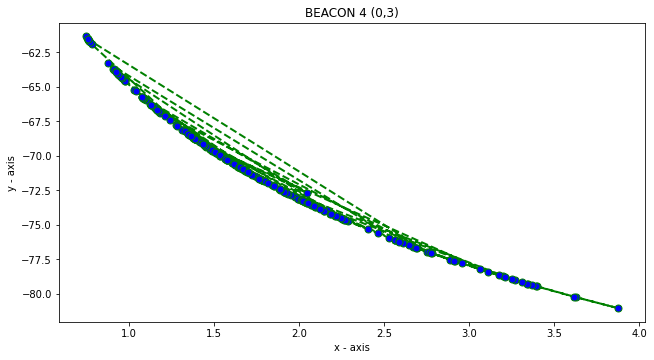

In [179]:
#@title
x = [-69.2697900258251, -69.83058430884556, -69.50418714583346, -70.28960217337782, -71.01692502670811, -71.06304101853596, -70.94829489539396, -70.75525214420003, -70.78266153500465, -70.6774204839446, -69.9968289798448, -69.4902039341683, -68.78243516897923, -69.33797548814974, -69.6052701454748, -69.55316963009903, -69.78941288627595, -69.63733207693812, -69.63728312003937, -69.02455949894185, -69.47158543937901, -69.52955349908147, -68.9630042245346, -69.26990432483245, -69.62502865546418, -69.93042807432074, -69.79000891085884, -69.53407527229187, -69.61069307089485, -70.2788310997093, -68.43746129099132, -70.30080218874791, -71.06375141233094, -71.67429541676111, -71.76831092498247, -71.68383938948097, -71.15648827797027, -71.3078253876661, -71.5568413980543, -71.7676693390654, -65.7177744288369, -65.25080972082168, -64.47437617137834, -64.03980182793325, -64.12491478589098, -64.01240410330597, -64.55558945671865, -64.60695627541367, -64.34861738247866, -63.68572266193084, -73.93006138906307, -72.60026263039452, -72.55204950651138, -74.5537094591792, -74.34976892581659, -73.60135536207325, -73.68851307487326, -73.7170814793498, -73.54078721956947, -73.11739285528007, -78.73435704386996, -79.28349059064149, -78.66176317589169, -78.22734196373693, -77.63730421351669, -77.08162390399006, -76.59230498365558, -76.18017623119943, -76.10976175598486, -76.4848830213859, -73.64079935191211, -72.6849516197221, -71.69706116240607, -70.68998493462794, -70.18957113614758, -69.98641863862034, -69.76072195067847, -69.97360049857572, -70.21218257361419, -70.49514107434476, -67.75990661217833, -69.01067779416135, -69.29908875707962, -69.24425945535226, -68.87900136880856, -68.68535940411762, -68.7677374633344, -68.78364507497959, -68.79225291716143, -68.7034974710403, -61.91824274507999, -61.611480623344804, -61.5623761890013, -61.6868428495527, -61.646947474305954, -61.78872897354059, -61.45708327096199, -61.34910170042547, -61.53113051999658, -61.5414554985735, -76.96693704915832, -76.70451716833513, -76.9966863799545, -79.47512042116303, -79.02010020032611, -80.26174184416169, -81.049775666097, -80.22294688700262, -79.46230087513965, -78.40662053176771, -69.17402201615955, -70.3170163357877, -71.073126176971, -71.46880877657584, -71.74894471711077, -71.77976038683842, -72.13494212752583, -72.43649485188644, -72.58867357418163, -72.60483387701858, -71.58221783878875, -73.99213069113803, -74.74932433929366, -75.62910274767789, -76.32717176826596, -76.09680209195464, -75.94835605854202, -76.09928154045194, -76.21066906917093, -76.22061340273676, -63.2594194051177, -63.78188638910565, -63.735848779513006, -63.88107384189159, -64.11008941732415, -64.09264701800127, -64.20086418905646, -64.25558708826794, -64.07953536766095, -63.93726917833997, -66.53281364197217, -66.61075981236917, -66.81188275738944, -66.87948847608885, -66.71429879371749, -66.72176375740626, -66.65547785782535, -66.61828150150367, -66.66905222656942, -66.78164703286828, -77.0584462315724, -77.80803522700059, -77.52451742427665, -76.67342617229426, -77.63086980204986, -78.79203904090411, -79.36936915858995, -79.26594773640846, -79.1681773895993, -78.9352997325596, -72.21559327288273, -73.2112129111402, -72.9844052003781, -73.15996672879, -73.43019009913922, -73.36271706871625, -73.35597690878213, -73.19958647069778, -73.10377177633461, -72.85602517959462, -70.83002267134049, -71.362167612159, -70.7880030715682, -70.64605863155249, -70.61398713928432, -70.82522498938593, -70.85626431911528, -70.9038283390058, -70.97836378537367, -71.2074996372532, -71.20935446336367, -70.84688900525771, -70.9695950022047, -71.19253054972525, -71.75958736047973, -71.86504253519654, -71.82209712182497, -71.86204141861585, -72.0059580691684, -71.66017296311287, -65.20531898364374, -66.27541752126807, -66.47819031989494, -66.32444772743997, -65.98449683115565, -66.2988000291539, -66.30600158838726, -66.67208390933676, -67.13564939334202, -67.42052337778777, -74.1899489851012, -73.34739298215463, -73.20883985485585, -73.37302647107968, -73.27808520243205, -73.30511604087197, -73.23767680620315, -73.2904516375043, -73.40106374833654, -73.45014451661955, -70.29616163369677, -72.39548206625098, -72.7355197090365, -72.57932814474985, -72.63024923710209, -72.70588914552053, -72.59048076199153, -72.44646035279257, -72.44347428562206, -72.22663184942795, -65.33651220308369, -65.7399218860218, -65.8404039803735, -65.88168122803837, -65.79796897323394, -65.8324384744596, -65.84683394507547, -65.78562631041406, -65.79155739933235, -65.7206747481225, -72.6948162787771, -68.79365693727415, -68.24065138592188, -68.44344071550694, -68.11716902199443, -67.80806867617582, -68.23427552887058, -68.46044508267406, -68.43349553106819, -68.5772182052109, -75.31194674647465, -74.4647782218, -74.67829478457554, -74.63357911770197, -74.63908262518073, -74.53954033887304, -74.37149799592663, -74.20437162981662, -73.99172840392916, -73.85343387905883]
y = readDataframe1['dist4']
plt.plot(y, x, color='green', linestyle='dashed', linewidth = 2,marker='o', markerfacecolor='blue', markersize=7)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('BEACON 4 (0,3)')
  
# function to show the plot
plt.show()

##RESULT Position Graph DEMO1

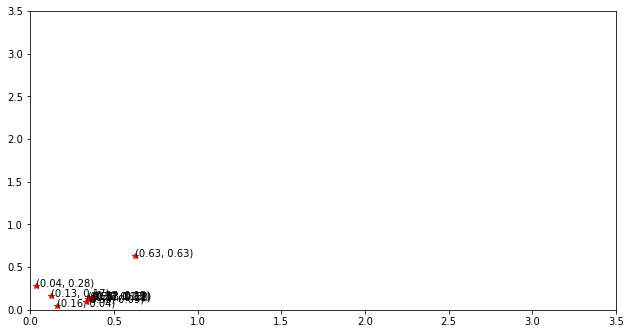

In [180]:
#@title (0.5,0.5) m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=0 and i<10:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(abs(a1+b1+c1+d1)/4)
      y.append(abs(a2+b2+c2+d2)/4)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

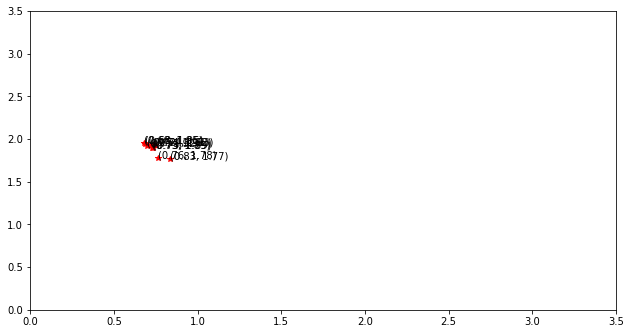

In [181]:
#@title (0.5,1)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=10 and i<20:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(abs(a1+b1+c1+d1)/4)
      y.append(abs(a2+b2+c2+d2)/4)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

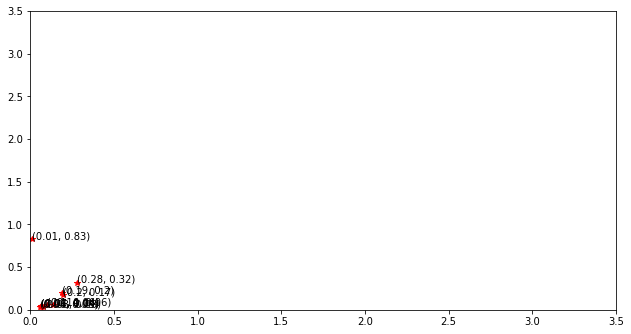

In [182]:
#@title (0.5,1.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=20 and i<30:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.2], [0,0,0.2], [3,0,0.2], D, A, B)[0]
      a2=trilateration([0,3,0.2], [0,0,0.2], [3,0,0.2], D, A, B)[1]

      b1=trilateration([0,0,0.2], [3,0,0.2], [3,3,0.2], A, B, C)[0]
      b2=trilateration([0,0,0.2], [3,0,0.2], [3,3,0.2], A, B, C)[1]

      c1=trilateration([3,0,0.2], [3,3,0.2], [0,3,0.2], B, C, D)[0]
      c2=trilateration([3,0,0.2], [3,3,0.2], [0,3,0.2], B, C, D)[1]

      d1=trilateration([3,3,0.2], [0,3,0.2], [0,0,0.2], C, D, A)[0]
      d2=trilateration([3,3,0.2], [0,3,0.2], [0,0,0.2], C, D, A)[1]
      
      x.append(abs((a1+b1+c1+d1)/4))
      y.append(abs((a2+b2+c2+d2)/4))



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

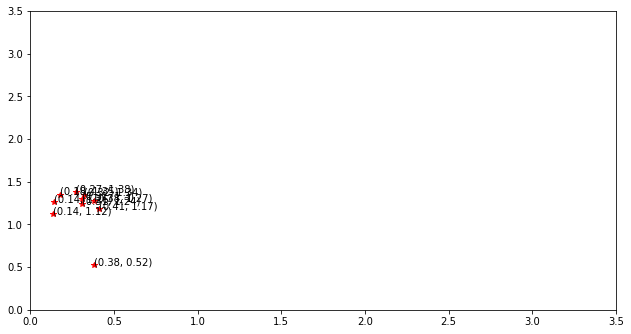

In [183]:
#@title (0.5,2)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=30 and i<40:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(abs((a1+b1+c1+d1)/4))
      y.append(abs((a2+b2+c2+d2)/4))



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

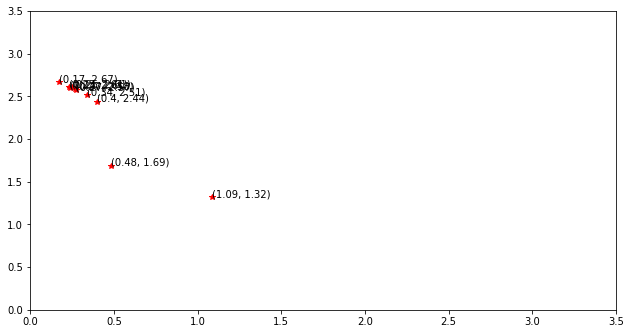

In [184]:
#@title (0.5,2.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=40 and i<50:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(abs((a1+b1+c1+d1)/4))
      y.append(abs((a2+b2+c2+d2)/4))



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

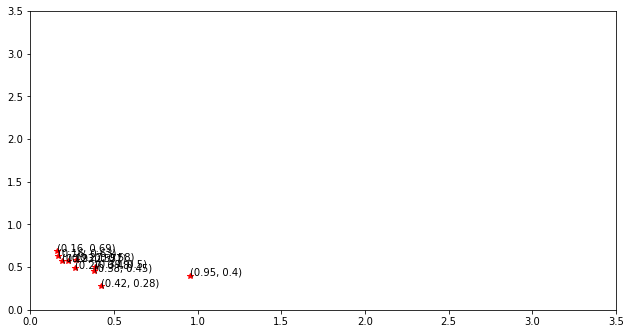

In [185]:
#@title (1,0.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=50 and i<60:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(abs((a1+b1+c1+d1)/4))
      y.append(abs((a2+b2+c2+d2)/4))



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

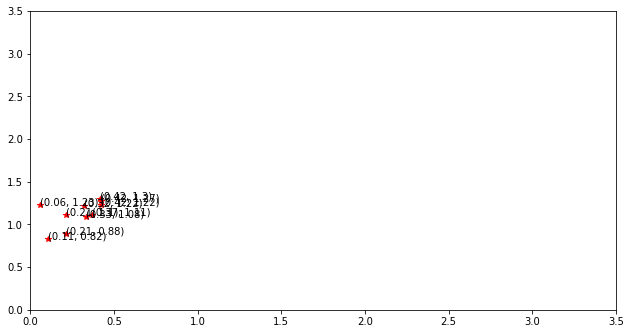

In [186]:
#@title (1,1)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=60 and i<70:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(abs((a1+b1+c1+d1)/4))
      y.append(abs((a2+b2+c2+d2)/4))



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

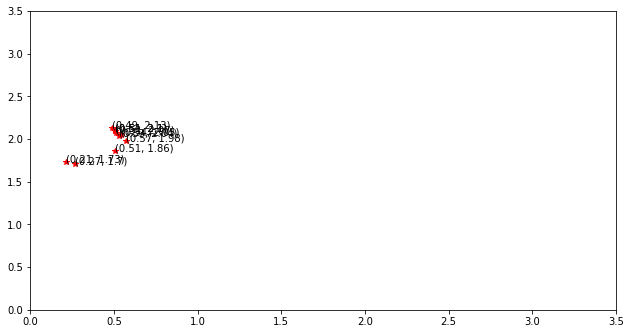

In [187]:
#@title (1,1.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=70 and i<80:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(abs((a1+b1+c1+d1)/4))
      y.append(abs((a2+b2+c2+d2)/4))



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

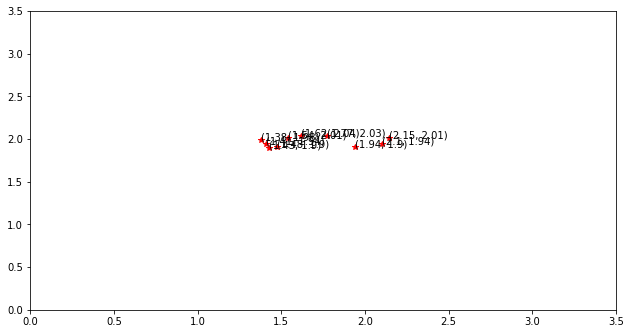

In [188]:
#@title (1,2)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=80 and i<90:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(abs((a1+b1+c1+d1)/4))
      y.append(abs((a2+b2+c2+d2)/4))



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

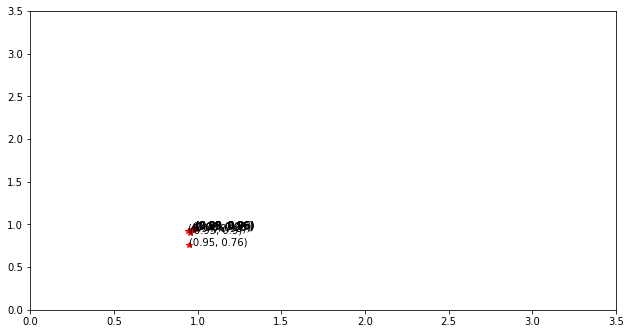

In [189]:
#@title (1,2.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=90 and i<100:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(abs((a1+b1+c1+d1)/4))
      y.append(a2)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

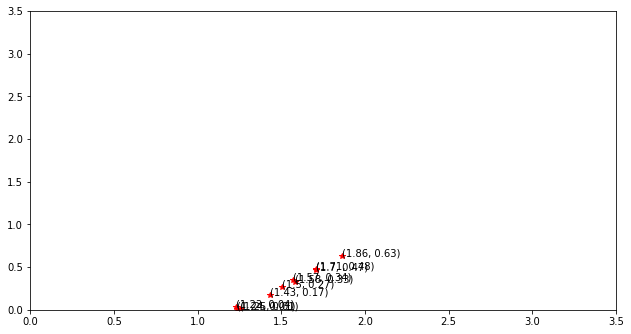

In [190]:
#@title (1.5,0.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=100 and i<110:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(abs((a1+b1+c1+d1)/4))
      y.append(abs((a2+b2+c2+d2)/4))



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

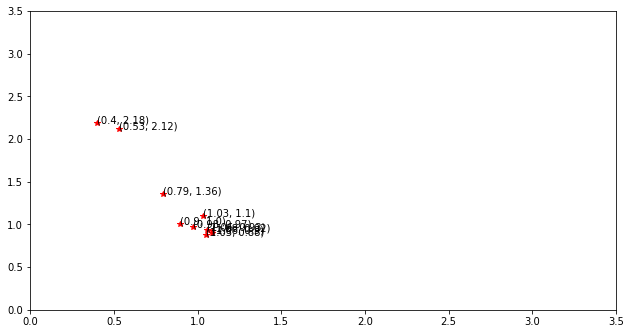

In [191]:
#@title (1.5,1)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=110 and i<120:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(abs((a1+b1+c1+d1)/4))
      y.append(abs((a2+b2+c2+d2)/4))



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

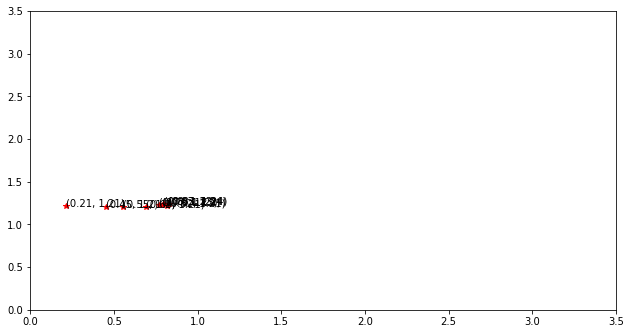

In [192]:
#@title (1.5,1.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=120 and i<130:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(c1)
      y.append(c2)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

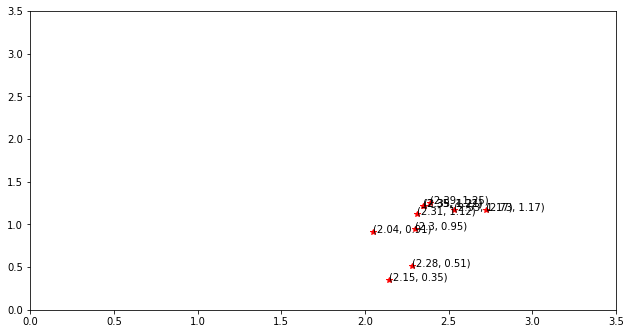

In [193]:
#@title (1.5,2)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=130 and i<140:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(b1)
      y.append(b2)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

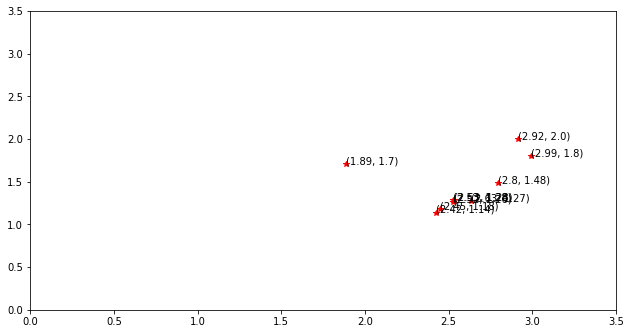

In [194]:
#@title (1.5,2.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=140 and i<150:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(a1)
      y.append(a2)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

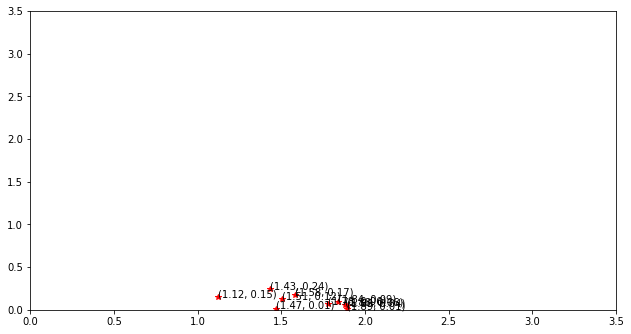

In [195]:
#@title (2,0.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=150 and i<160:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(abs((a1+b1+c1+d1)/4))
      y.append(abs((a2+b2+c2+d2)/4))



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

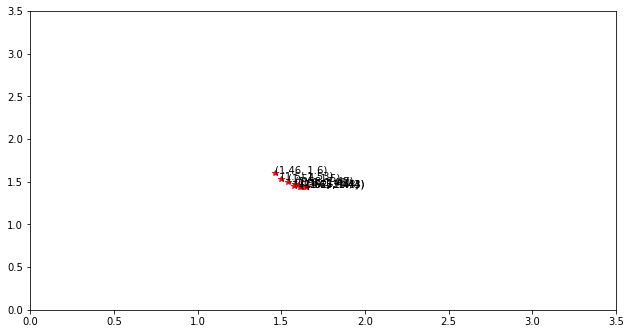

In [196]:
#@title (2,1)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=160 and i<170:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(b1)
      y.append(b2)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

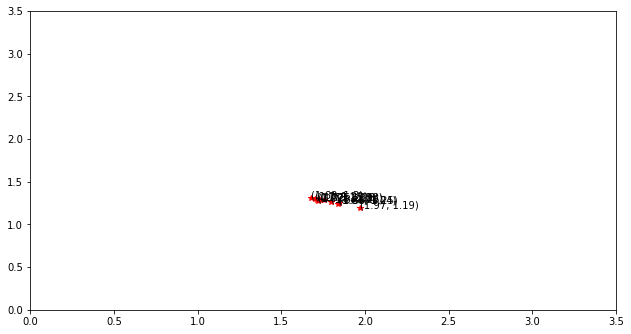

In [197]:
#@title (2,1.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=170 and i<180:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(b1)
      y.append(b2)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

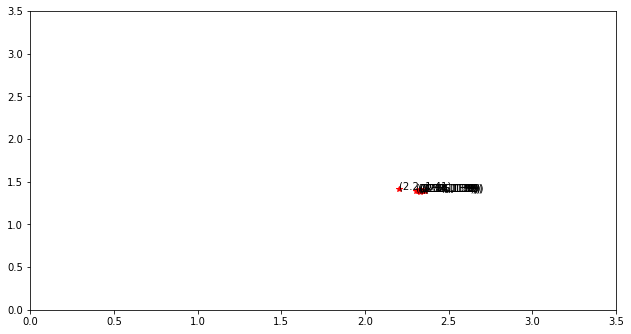

In [198]:
#@title (2,2)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=180 and i<190:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(b1)
      y.append(b2)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

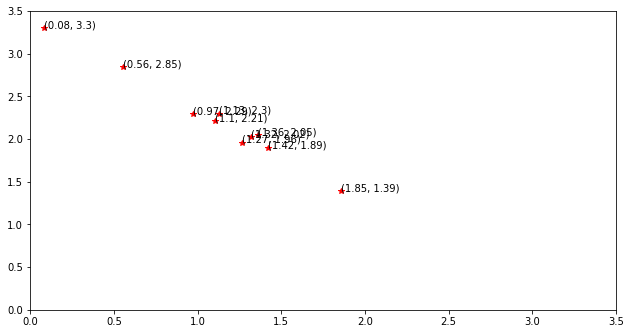

In [199]:
#@title (2,2.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=190 and i<200:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(b1)
      y.append(b2)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

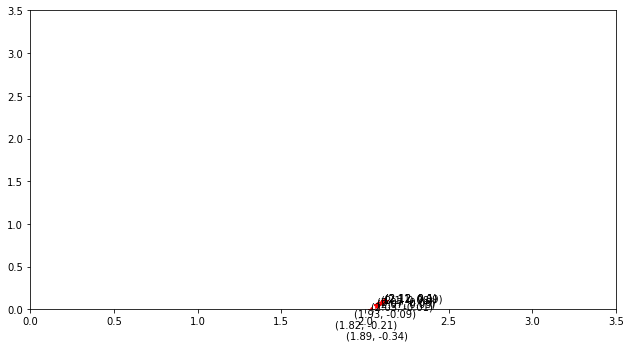

In [200]:
#@title (2.5,0.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=200 and i<210:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(a1)
      y.append(a2)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

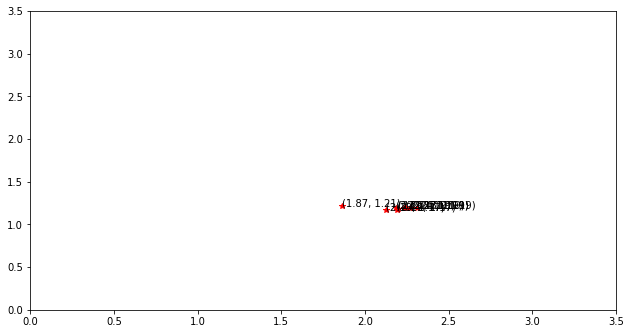

In [201]:
#@title (2.5,1)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=210 and i<220:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(b1)
      y.append(b2)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

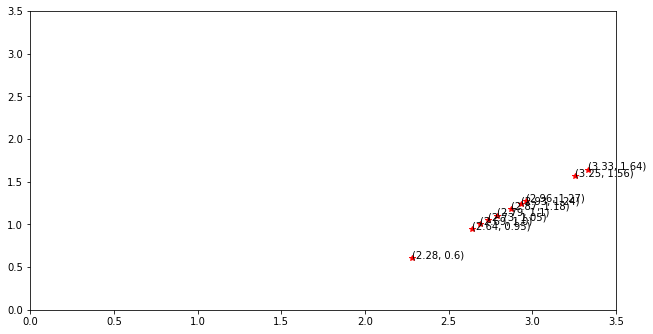

In [202]:
#@title (2.5,1.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=220 and i<230:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(a1)
      y.append(a2)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

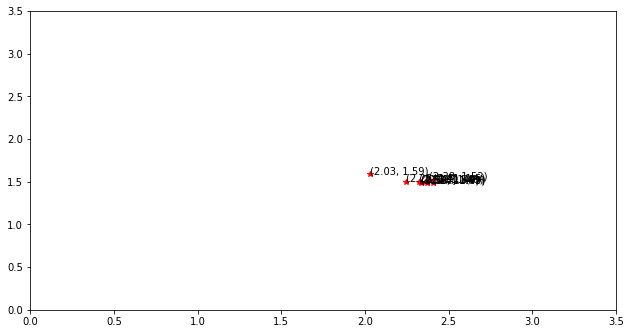

In [203]:
#@title (2.5,2)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=230 and i<240:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(b1)
      y.append(b2)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()

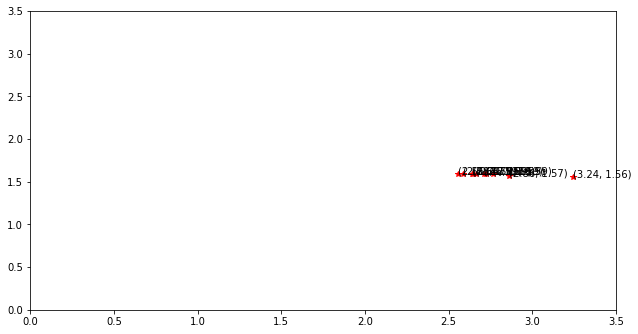

In [204]:
#@title (2,2.5)m
a1 = 0
a2 = 0
b1 = 0
b2 = 0
c1 = 0
c2 = 0
d1 = 0
d2 = 0

x=[]
y=[]

for i in range(len(readDataframe1["dist1"])): #0.5,0.5
    if i>=240 and i<250:
      
      A = readDataframe1["dist1"][i]
      B = readDataframe1["dist2"][i]
      C = readDataframe1["dist3"][i]
      D = readDataframe1["dist4"][i]

      if A >= 4.24 :
        A = 4.24
      if B >= 4.24 :
        B = 4.24
      if C >= 4.24 :
        C = 4.24
      if D >= 4.24 :
        D = 4.24
      a1=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[0]
      a2=trilateration([0,3,0.1], [0,0,0.1], [3,0,0.1], D, A, B)[1]

      b1=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[0]
      b2=trilateration([0,0,0.1], [3,0,0.1], [3,3,0.1], A, B, C)[1]

      c1=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[0]
      c2=trilateration([3,0,0.1], [3,3,0.1], [0,3,0.1], B, C, D)[1]

      d1=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[0]
      d2=trilateration([3,3,0.1], [0,3,0.1], [0,0,0.1], C, D, A)[1]
      
      x.append(b1)
      y.append(b2)



plt.rcParams["figure.figsize"] = [10.50, 5.50] 
plt.rcParams["figure.autolayout"] = False

plt.plot(x, y, 'r*')
plt.axis([0, 3.5, 0, 3.5])

for i, j in zip(x, y):
   plt.text(i, j, '({}, {})'.format(np.round(i,2), np.round(j,2)))

plt.show()